In [ ]:
#Required Libraries for Data Visualization
pip install folium
pip install pandas
pip install matplotlib
pip install branca

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from unicodedata import normalize

#Reading Database Data through HTML Table created using .PHP file
MainData = pd.read_html('https://nencheppadengey.000webhostapp.com/UserGeoLocationTable/displayData.php')[0]

#Data Cleaning - to remove NA's inserted into table during Testing/Deployment
MainData = MainData.dropna()

In [4]:
#Visualizing Table
MainData

,PublicIPAddress,City,State,Country,Longitude,Latitude
0,67.188.232.123,Milpitas,California,United States,-121.8954,37.4371
2,76.126.45.216,San Jose,California,United States,-121.9380,37.3177
3,76.126.45.216,San Jose,California,United States,-121.9380,37.3177


In [2]:
import statistics

#Getting reference longitude and latitude values to zoom in map by averaging Longitude and Latitude values of User Base
RefLong = statistics.mean(MainData['Longitude'])
RefLat = statistics.mean(MainData['Latitude'])

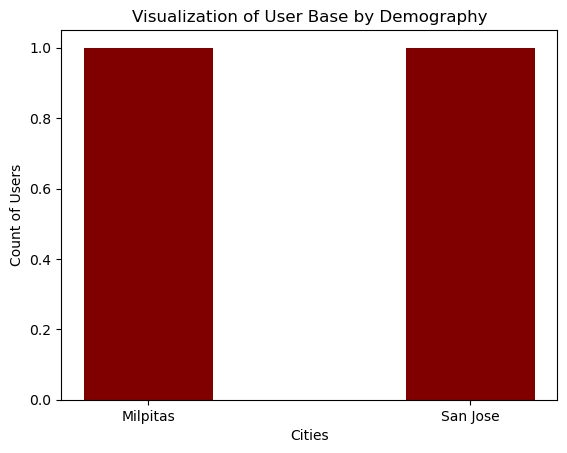

                                       Map Visualization of Last Seen Location of User Base


In [3]:
import folium

#Isolate Map Data from Main Data
MapData = MainData.groupby("PublicIPAddress").agg({"Longitude": "last", "Latitude": "last"}).reset_index()

#Creating Bubble GeoLocation Map to visualize 'Last seen Location' of Users
n = folium.Map(location=[RefLat,RefLong], tiles="OpenStreetMap", zoom_start=11)

#Creating Bubble
for i in range(0,len(MapData)):
   folium.CircleMarker(
      location=[MapData.iloc[i]['Latitude'], MapData.iloc[i]['Longitude']],
      popup=MapData.iloc[i]['PublicIPAddress'],
      radius=float(15),
      color='#69b3a2',
      fill=True,
      fill_color='#69b3a2'
   ).add_to(n)

#Creating PinPointLocation Map to visualize 'Last seen Location' of Users
m = folium.Map((RefLat, RefLong), tiles="cartodb positron", zoom_start=11)

for i in range(len(MapData)):
    group_1 = folium.FeatureGroup("first group").add_to(m)
    folium.Marker((MapData.iloc[i]['Latitude'], MapData.iloc[i]['Longitude']),popup=MapData.iloc[i]['PublicIPAddress'], icon=folium.Icon("red")).add_to(group_1)


folium.LayerControl().add_to(m)

#Collating both maps side-by-side
import branca

fig = branca.element.Figure(title="Visualization of User Base by Demography")

subplot1 = fig.add_subplot(1, 2, 1)
subplot2 = fig.add_subplot(1, 2, 2)


subplot1.add_child(
    m
)
subplot2.add_child(
    n
)


#Isolating Data for Bar Chart that visualises how many total users by city
BarChartData = MainData.groupby("City")["PublicIPAddress"].nunique().reset_index(name="No. of Users")

plt.bar(BarChartData['City'], BarChartData['No. of Users'], color ='maroon',
        width = 0.4)
 
plt.xlabel("Cities")
plt.ylabel("Count of Users")
plt.title("Visualization of User Base by Demography")
plt.show()

#Combined side-by-side Map
print("                                       Map Visualization of Last Seen Location of User Base")
fig
